<a href="https://colab.research.google.com/github/Kavinaya05/Intrusion-Detection/blob/main/Intrusion_Detection_System_%5BNSL_KDD%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams["figure.figsize"] = (10,6)

 READ DATASET

In [2]:
df_0 = pd.read_csv("KDDTrain+.txt")
df= df_0.copy()
df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15.000
1,0,tcp,private,S0,0.000,0.000,0.000,0.000,0.000,0.000,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19.000
2,0,tcp,http,SF,232.000,8153.000,0.000,0.000,0.000,0.000,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21.000
3,0,tcp,http,SF,199.000,420.000,0.000,0.000,0.000,0.000,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21.000
4,0,tcp,private,REJ,0.000,0.000,0.000,0.000,0.000,0.000,...,0.070,0.070,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21.000


ADJUST COLUMNS

In [3]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns

In [4]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15.000
1,0,tcp,private,S0,0.000,0.000,0.000,0.000,0.000,0.000,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19.000
2,0,tcp,http,SF,232.000,8153.000,0.000,0.000,0.000,0.000,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21.000
3,0,tcp,http,SF,199.000,420.000,0.000,0.000,0.000,0.000,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21.000
4,0,tcp,private,REJ,0.000,0.000,0.000,0.000,0.000,0.000,...,0.070,0.070,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21.000


 INSIGHTS

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6912 entries, 0 to 6911
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     6912 non-null   int64  
 1   protocol_type                6912 non-null   object 
 2   service                      6911 non-null   object 
 3   flag                         6911 non-null   object 
 4   src_bytes                    6911 non-null   float64
 5   dst_bytes                    6911 non-null   float64
 6   land                         6911 non-null   float64
 7   wrong_fragment               6911 non-null   float64
 8   urgent                       6911 non-null   float64
 9   hot                          6911 non-null   float64
 10  num_failed_logins            6911 non-null   float64
 11  logged_in                    6911 non-null   float64
 12  num_compromised              6911 non-null   float64
 13  root_shell        

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,6912.000,323.406,2814.496,0.000,0.000,0.000,0.000,41802.000
src_bytes,6911.000,65984.792,4595261.023,0.000,0.000,44.000,281.000,381709090.000
dst_bytes,6911.000,2084.389,27531.565,0.000,0.000,0.000,543.500,1639484.000
land,6911.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
wrong_fragment,6911.000,0.027,0.281,0.000,0.000,0.000,0.000,3.000
urgent,6911.000,0.000,0.012,0.000,0.000,0.000,0.000,1.000
hot,6911.000,0.175,1.965,0.000,0.000,0.000,0.000,30.000
num_failed_logins,6911.000,0.002,0.047,0.000,0.000,0.000,0.000,2.000
logged_in,6911.000,0.396,0.489,0.000,0.000,0.000,1.000,1.000
num_compromised,6911.000,0.149,6.166,0.000,0.000,0.000,0.000,462.000


DATA CLEANING

 NULL VALUES

In [7]:
df.isnull().sum()

,0
duration,0
protocol_type,0
service,1
flag,1
src_bytes,1
dst_bytes,1
land,1
wrong_fragment,1
urgent,1
hot,1


Dataset doesn't contain any null value

In [8]:
#helper function for deeper analysis
def unique_values(df, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""

    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [9]:
cat_features = df.select_dtypes(include='object').columns
unique_values(df, cat_features)

Column: protocol_type
------------------------------
Unique Values (4): ['udp' 'tcp' 'icmp' 'tc']

Value Counts:
protocol_type
tcp     5641
udp      814
icmp     456
tc         1
Name: count, dtype: int64

Column: service
------------------------------
Unique Values (65): ['other' 'private' 'http' 'remote_job' 'ftp_data' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' nan]

Value Counts:
service
http        2177
private     1238
domain_u     470
smtp         411
ftp_data     367
            ... 
printer        3
X11            3
ti

Further analysis will be in EDA-VISAULAZTION part about these column's impacts on Attacks

DUPLICATES

In [10]:
df.duplicated().sum()

0

Dataset doesn't contain any duplicated row

OUTLIERS

In [11]:
df.shape

(6912, 43)

<Figure size 2000x4000 with 0 Axes>

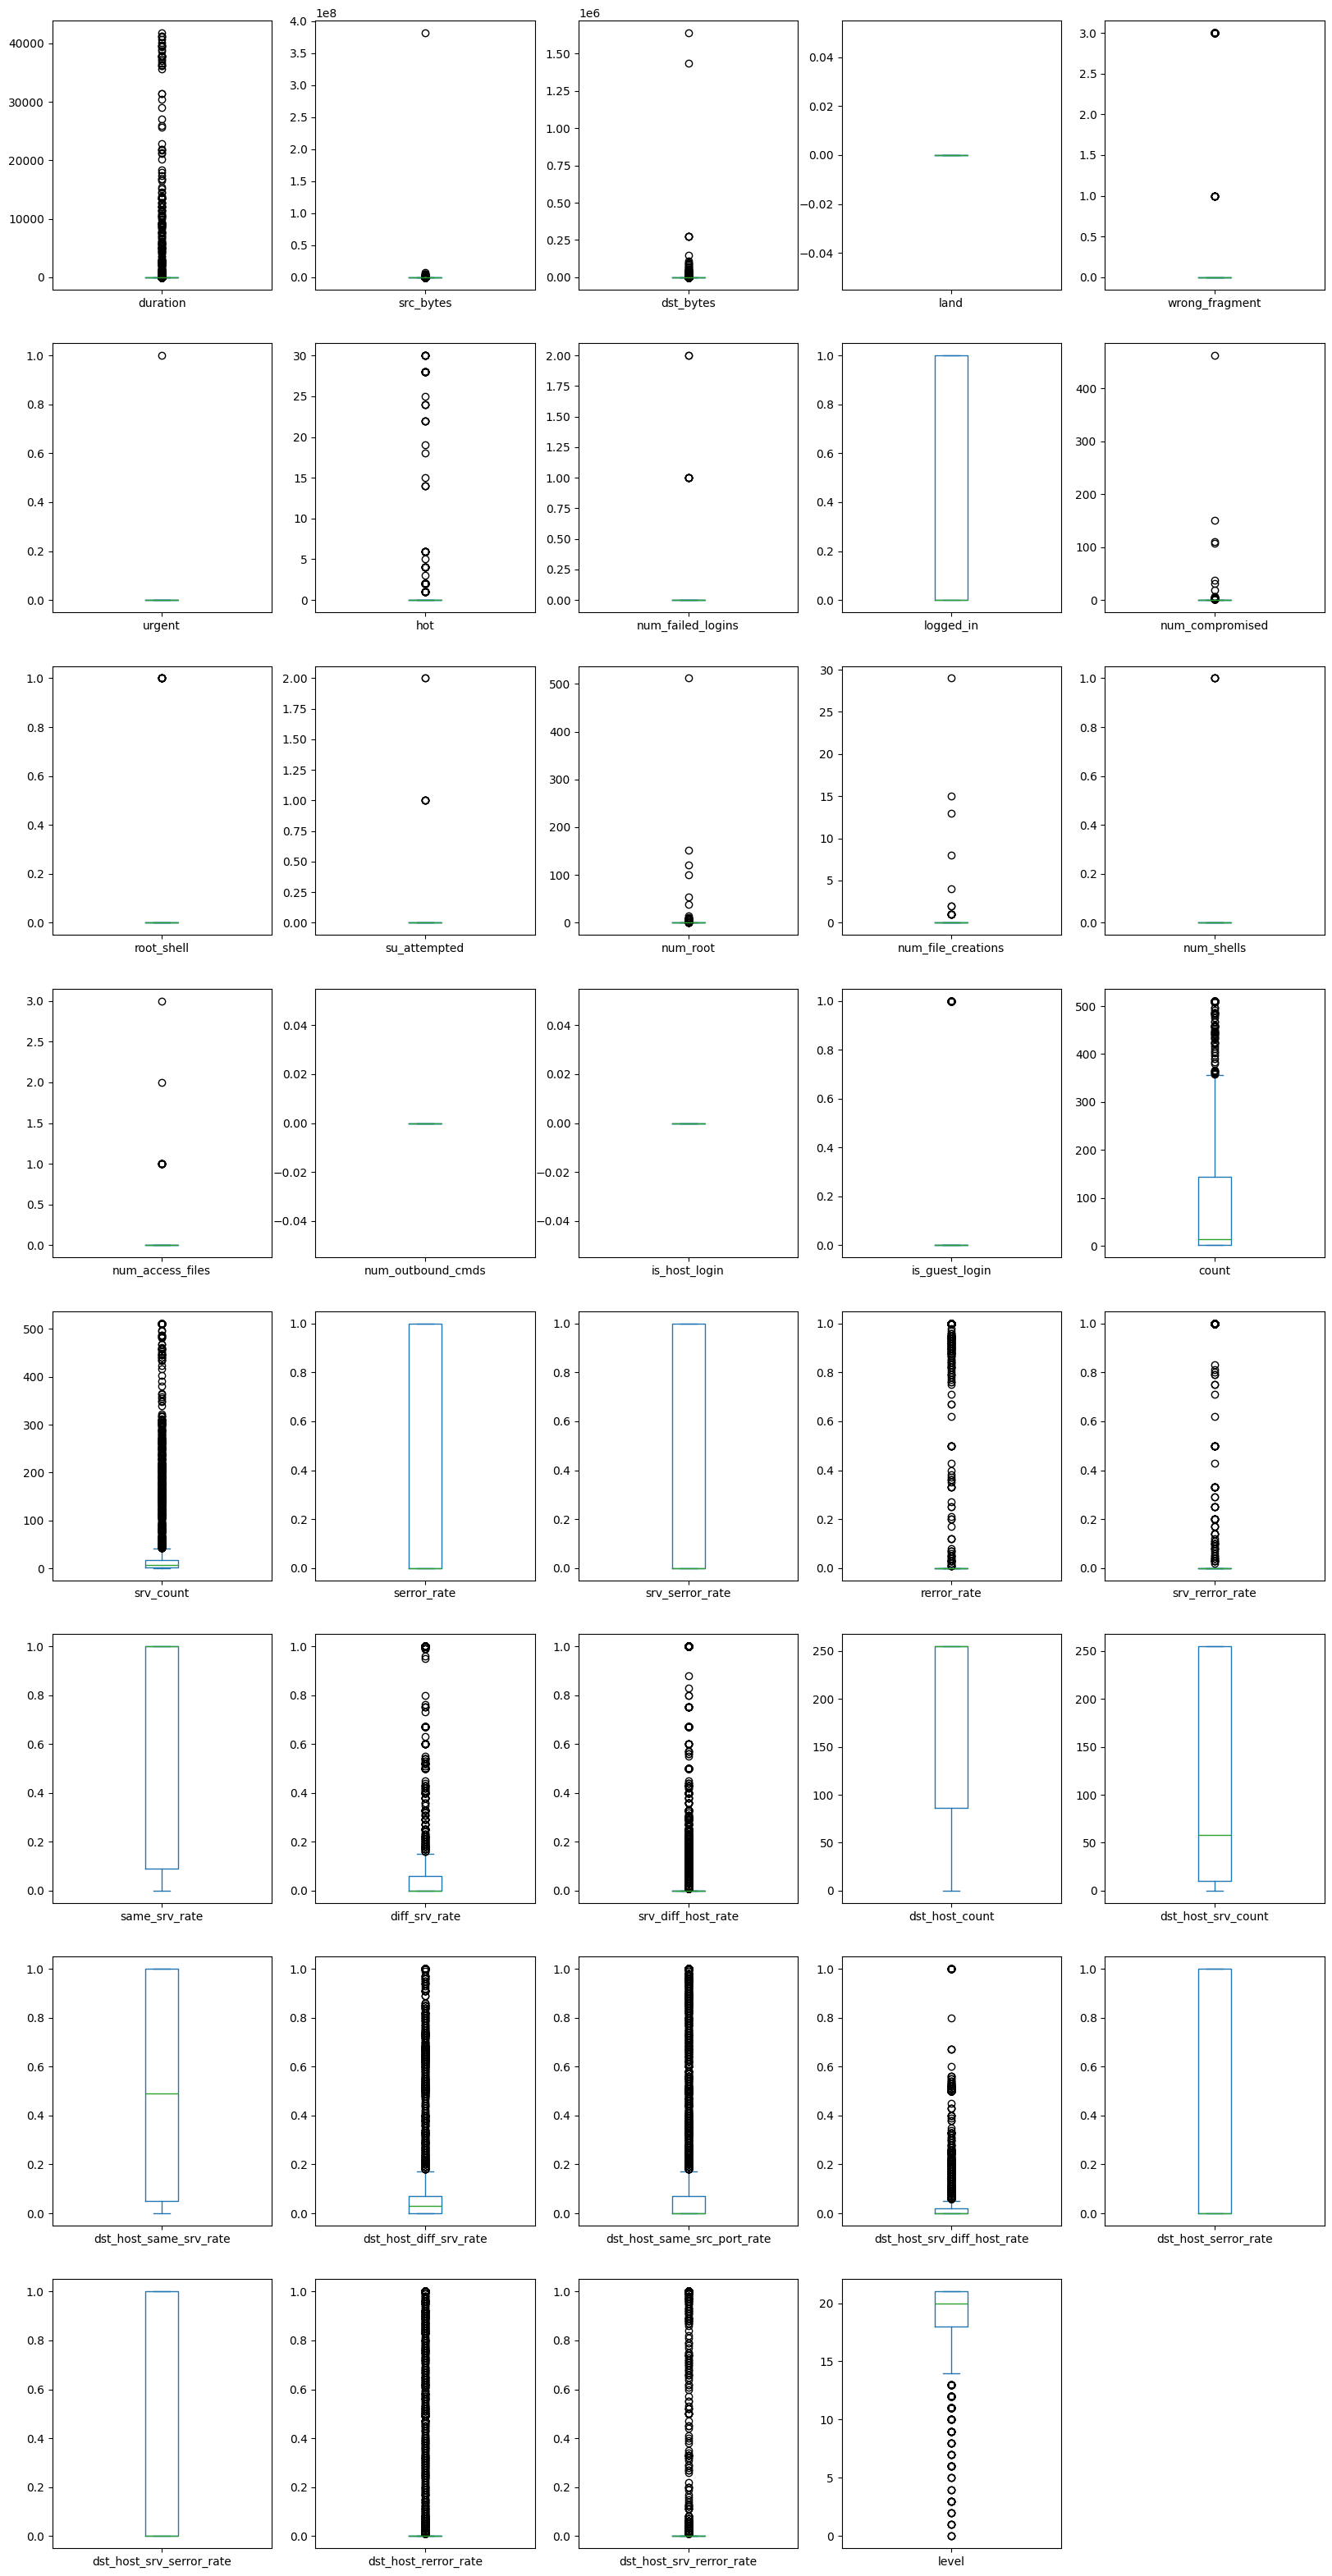

In [12]:
plt.figure(figsize=(20, 40))
df.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40))
plt.show()

There is no too much outlier to misslead the model so i will not drop the outliers

 CLASSIFY ATTACK OR NOT

In [13]:
attack_n = []
for i in df.attack :
  if i == 'normal':
    attack_n.append("normal")
  else:
    attack_n.append("attack")
df['attack'] = attack_n

In [14]:
df['attack'].unique()

array(['normal', 'attack'], dtype=object)

 Protocol Type

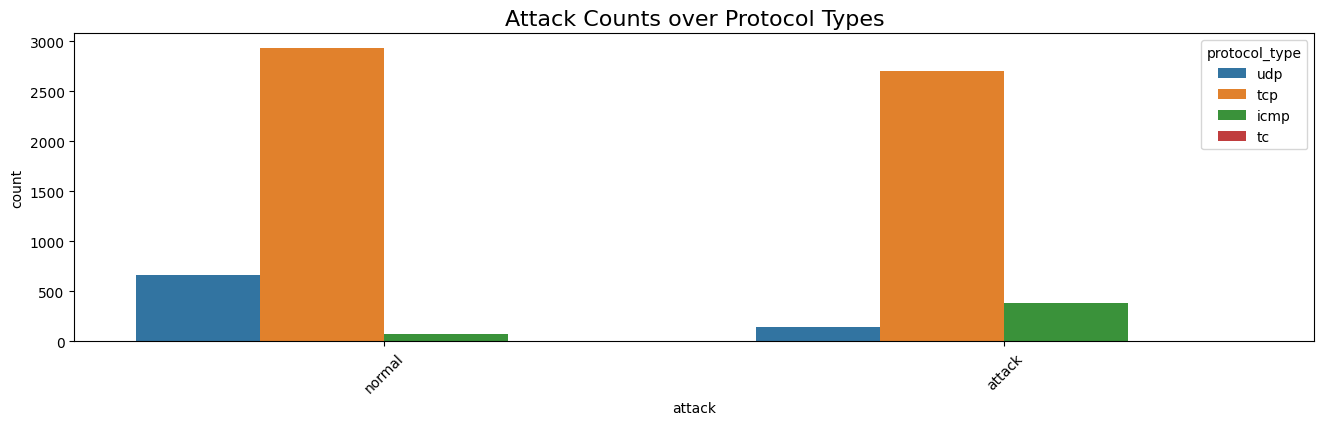

In [15]:
plt.figure(figsize=(16,4))
sns.countplot(x='attack',data=df,hue='protocol_type')
plt.xticks(rotation=45)
plt.title('Attack Counts over Protocol Types',fontdict={'fontsize':16})
plt.show()

In [ ]:
# So we can see that most of the attacks are from tcp, then udp, and least attack comes from icmp

In [16]:
df["protocol_type"].value_counts(normalize=True)

,proportion
protocol_type,
tcp,0.816
udp,0.118
icmp,0.066
tc,0.000


Service used effect on attacks

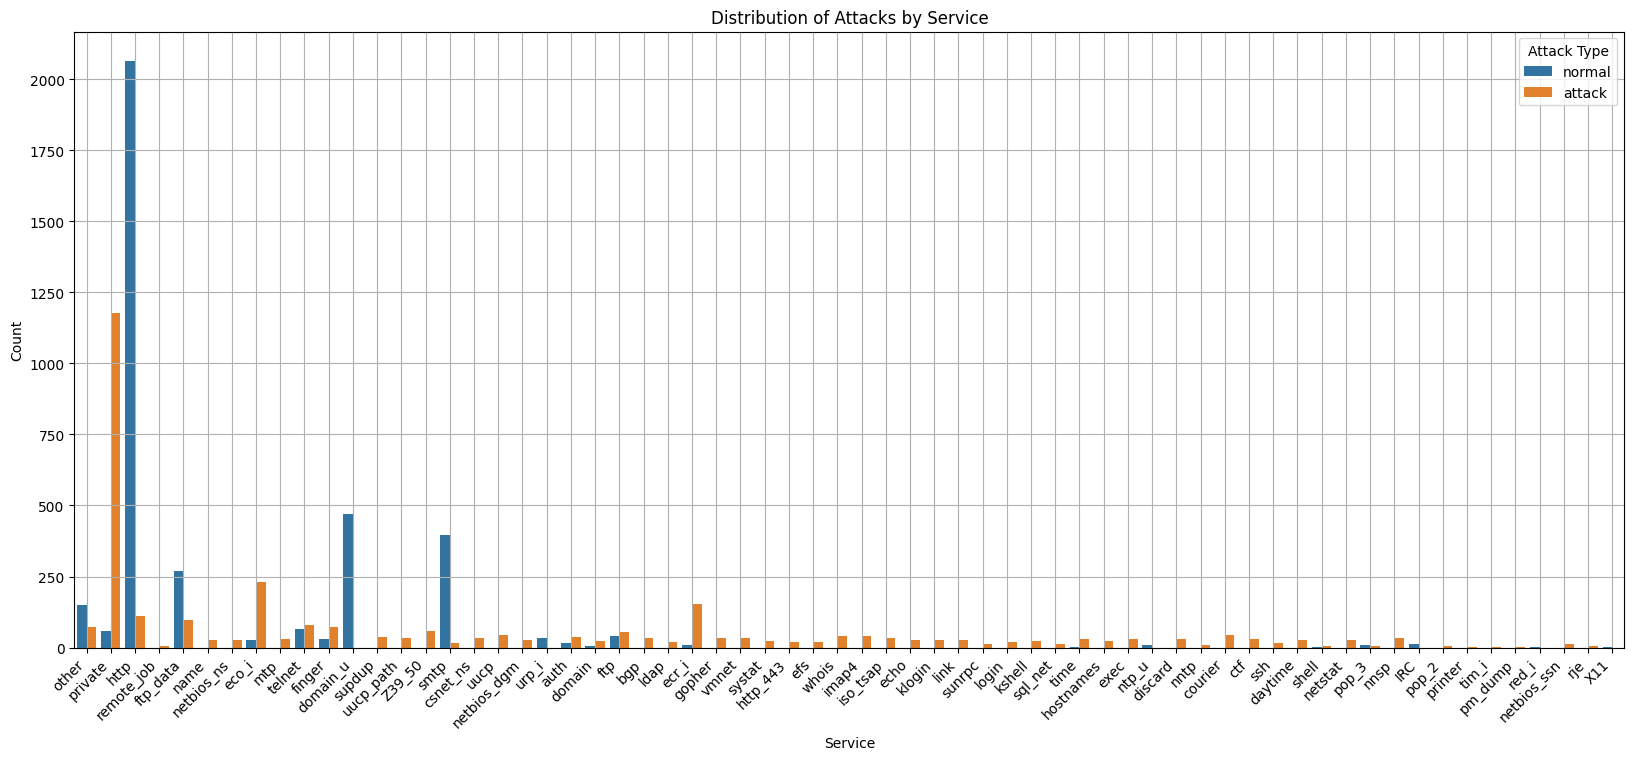

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', hue='attack', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of Attacks by Service')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()


In [ ]:
#we can see that private attacks is most common service

ENCODING

In [19]:
cat_features = df.select_dtypes(include='object').columns
cat_features

Index(['protocol_type', 'service', 'flag', 'attack'], dtype='object')

In [20]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
clm=['protocol_type', 'service', 'flag', 'attack']
for x in clm:
    df[x]=le.fit_transform(df[x])

TRAIN-TEST-SPLIT

In [21]:
from sklearn.model_selection import train_test_split

X = df.drop(["attack"], axis=1)
y = df["attack"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1,random_state=43)

In [22]:
train_index = X_train.columns
train_index

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

Feature Engineering

In [23]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = train_index
mutual_info.sort_values(ascending=False)

,0
src_bytes,0.558
service,0.478
dst_bytes,0.439
flag,0.366
diff_srv_rate,0.354
same_srv_rate,0.349
dst_host_srv_count,0.314
dst_host_same_srv_rate,0.307
dst_host_serror_rate,0.298
dst_host_diff_srv_rate,0.293


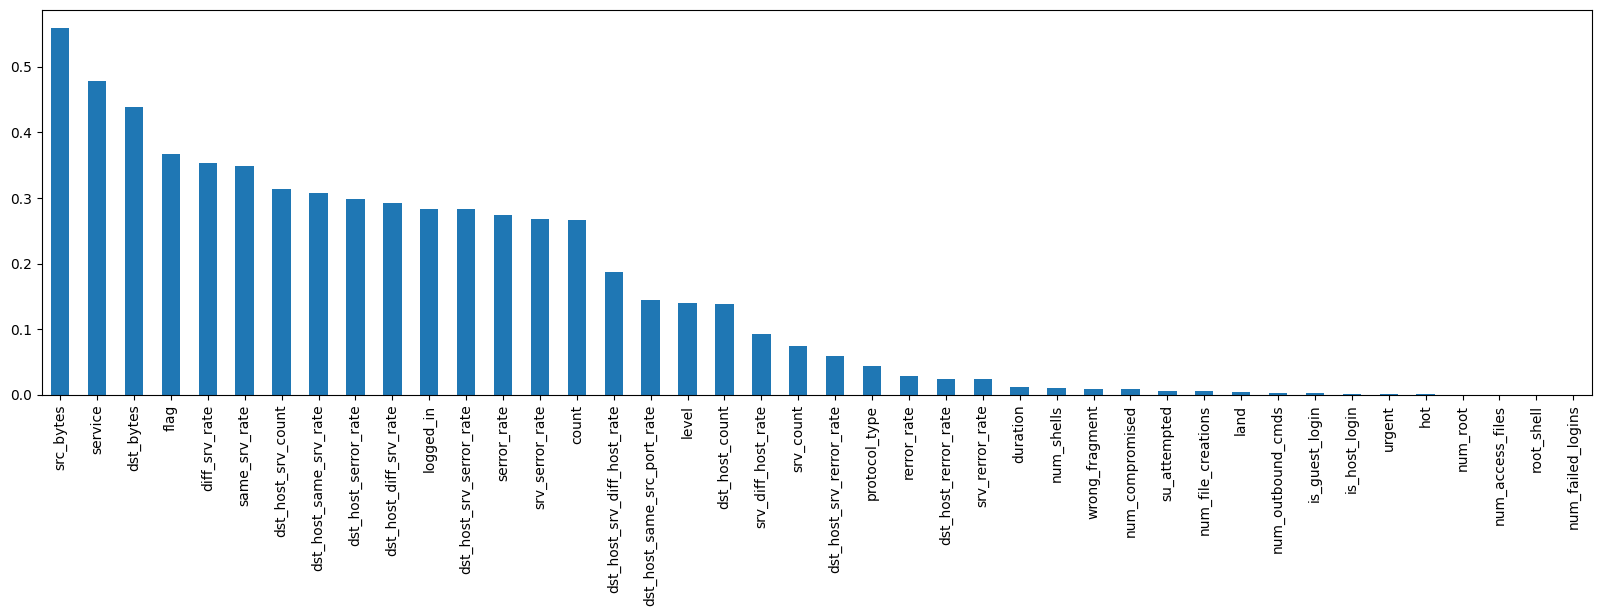

In [24]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 5));

Feature Selection

In [25]:
from sklearn.feature_selection import SelectKBest
Select_features = SelectKBest(mutual_info_classif, k=30)
Select_features.fit(X_train, y_train)
train_index[Select_features.get_support()]

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'hot', 'logged_in', 'su_attempted', 'is_host_login',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

In [26]:
columns=['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'num_compromised',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate']

# continue model with top 15 features, because dataset is big enough

X_train=X_train[columns]
X_test=X_test[columns]

Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) #  only transform in order to prevent data leakage

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [32]:
# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_clf.predict(X_test)

# Evaluation Metrics
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt, average='weighted')
dt_recall = recall_score(y_test, y_pred_dt, average='weighted')
dt_f1 = f1_score(y_test, y_pred_dt, average='weighted')

print("Decision Tree Metrics:")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")



Decision Tree Metrics:
Accuracy: 0.9957
Precision: 0.9957


In [31]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_clf.predict(X_test)

# Evaluation Metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

print("\nRandom Forest Metrics:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")




Random Forest Metrics:
Accuracy: 0.9942
Precision: 0.9943


In [34]:

import pandas as pd


metrics_comparison = {
    "Metric": ["Accuracy", "Precision"],
    "Decision Tree": [dt_accuracy, dt_precision],
    "Random Forest": [rf_accuracy, rf_precision]
}


comparison_df = pd.DataFrame(metrics_comparison)


print(comparison_df)


      Metric  Decision Tree  Random Forest
0   Accuracy          0.996          0.994
1  Precision          0.996          0.994


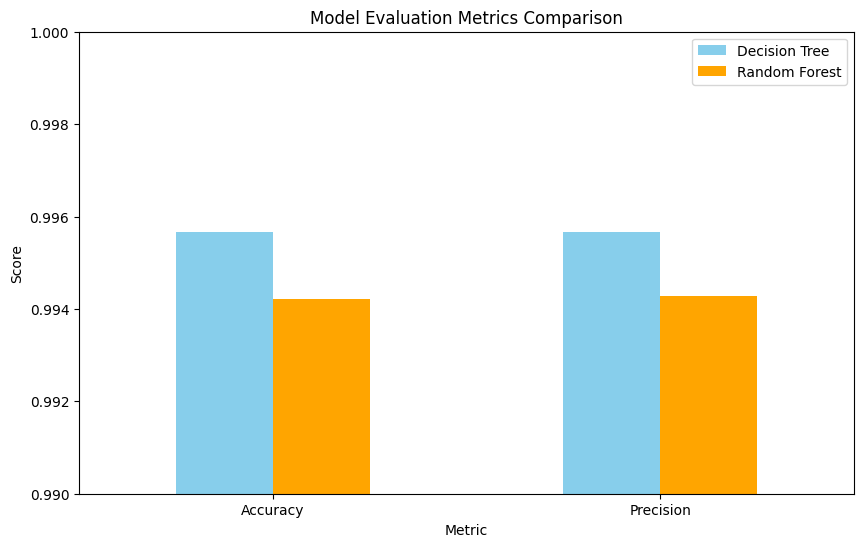

In [35]:
import matplotlib.pyplot as plt


comparison_df.set_index("Metric").plot(kind="bar", figsize=(10, 6), color=["skyblue", "orange"])
plt.title("Model Evaluation Metrics Comparison")
plt.ylabel("Score")
plt.ylim(0.99, 1.00)
plt.xticks(rotation=0)
plt.legend(["Decision Tree", "Random Forest"])
plt.show()
